
## Lets Grow More
## Data Science Intern
## By:Parth Kalsi


### Stock Market Prediction And Forecasting Using Stacked LSTM

### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the  Dataset

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


### Conclusion:No null values in this dataset

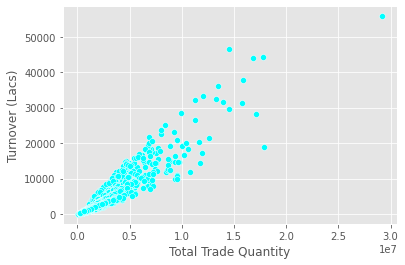

In [4]:
import seaborn as sns
from matplotlib import style
style.use("ggplot")
sns.scatterplot(x="Total Trade Quantity" , y="Turnover (Lacs)", data=data,color="cyan")

### Splitting the dataset into the Training set and Test set

In [5]:
train=data.iloc[:, 1:2].values
train

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler as msc
scaler = msc(feature_range = (0, 1))
train_new = scaler.fit_transform(train)
train_new

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [7]:
X_train = []
y_train = []
for x in range(60, 2035):
    X_train.append(train_new[x-60:x, 0])
    y_train.append(train_new[x, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Importing other Libraries

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [10]:
#Making RNN sequential layer 
reg = Sequential()

#Adding the first LSTM layerand performing some dropout regularisation
reg.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

#Adding the second LSTM layerand performing some dropout
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

#Adding the third LSTM layer and performing some dropout
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

#Adding the fourth LSTM layer and performing some dropout
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

In [11]:
#Fitting and training the data
reg.add(Dense(units = 1))

reg.compile(optimizer = 'adam', loss = 'mean_squared_error')

reg.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 15s 133ms/step - loss: 0.0115
Epoch 2/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0040
Epoch 3/100
62/62 [==============================] - 8s 135ms/step - loss: 0.0026
Epoch 4/100
62/62 [==============================] - 8s 135ms/step - loss: 0.0030
Epoch 5/100
62/62 [==============================] - 8s 132ms/step - loss: 0.0023
Epoch 6/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 8s 132ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0023
Epoch 9/100
62/62 [==============================] - 8s 132ms/step - loss: 0.0023
Epoch 10/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0022
Epoch 11/100
62/62 [==============================] - 8s 132ms/step - loss: 0.0020
Epoch 12/100
62/62 [==============================] - 8s 131ms/step - loss: 0.0020
Epoch 13/100

In [12]:
# Getting the real stock price
data_test = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv')
rsp = data_test.iloc[:, 1:2].values
rsp

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [13]:
# Getting the predicted stock price
data_total = pd.concat((data['Open'], data_test['Open']), axis = 0)
input = data_total[len(data_total) - len(data_test) - 60:].values
input = input.reshape(-1,1)
input = scaler.transform(input)
X_test = []

for i in range(60, 76):
    X_test.append(input[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
psp = reg.predict(X_test)

psp = scaler.inverse_transform(psp)

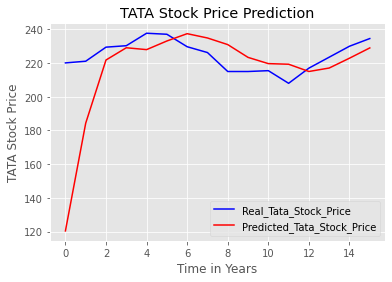

In [14]:
#Plotting
plt.plot(rsp, color = 'blue',label = 'Real_Tata_Stock_Price')
plt.plot(psp, color = 'red',label = 'Predicted_Tata_Stock_Price')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time in Years')
plt.ylabel('Tata Stock Price')
plt.legend()
plt.show()